<a href="https://colab.research.google.com/github/SKYtp/Plant_Image_Classification_Using_Alexnet/blob/main/Plant_Image_Classification_Using_Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Image Classification Using Alexnet Architecture

This code does image classification for 7 fruit categories = ['apple', 'cabbage', 'carrot', 'cucumber', 'eggplant', 'pear', 'zucchini']

In [84]:
#importing necessary libraries
import os
import cv2
from glob import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [85]:
#Setting Training dir paths
train_path = '/content/data/'

In [86]:
#Setting Test dir paths
test_path = '/content/data2/'

# Exploratory Data Analysis

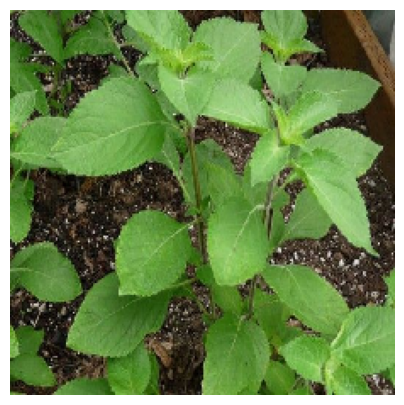

In [87]:
#Displaying the image
img = load_img(train_path + "Holy basil/0fc08a283c1c69c2e4f0da1ab316092c.jpg", target_size=(227,227))
plt.imshow(img)
plt.axis("off")
plt.show()

In [88]:
#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

(227, 227, 3)


In [89]:
#Getting the count of images for each class
image_count = []
class_names = []
print('{:18s}'.format('class'), end='')
print('Count:')
print('-' * 24)
#Reading the image from each folder from training path
for folder in os.listdir(train_path):
    folder_num = len(os.listdir(os.path.join(train_path,folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)
print('-' * 24)
print("Number of classes : ",len(class_names))

class             Count:
------------------------
Mint                 62
Sweet basil          27
Holy basil           33
------------------------
Number of classes :  3


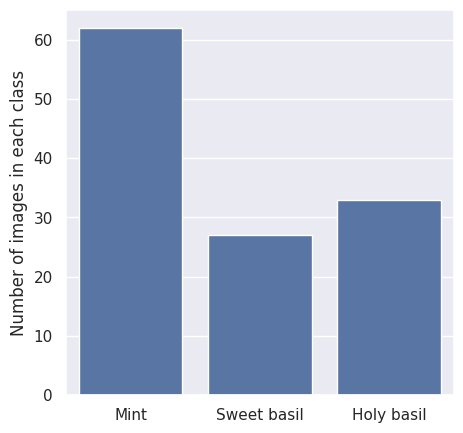

In [90]:
#Plotting the count of images for each class
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x=class_names, y=image_count)
plt.ylabel('Number of images in each class')
plt.show()

In [91]:
#Finding number of classes
className = glob(train_path + '/*')
num_classes = len(className)
print(num_classes)

3


# Model using Alexnet architecture

This model consist of 5 convolution layers followed by 3 fully connected layers. Ativation function used is relu. The network consists of a kernel or filters with size 11 x 11, 5 x 5, 3 x 3, 3 x 3 and 3 x 3 for its five convolutional layers respectively.

In [92]:
#Using Alexnet architecture. input is 227, 227,3 image and output is 7 classes of fruits
model = tf.keras.models.Sequential([
    #1st Convolutional Layer
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #2nd Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #3rd Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #4th Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #5th Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #Passing it to a Fully Connected layer
    tf.keras.layers.Flatten(),
    # 1st Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),# Add Dropout to prevent overfitting
    # 2nd Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    # 3rd Fully Connected Layer
    tf.keras.layers.Dense(1000, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    #Output Layer
    tf.keras.layers.Dense(3, activation='softmax'),
    #tf.keras.layers.BatchNormalization()
])

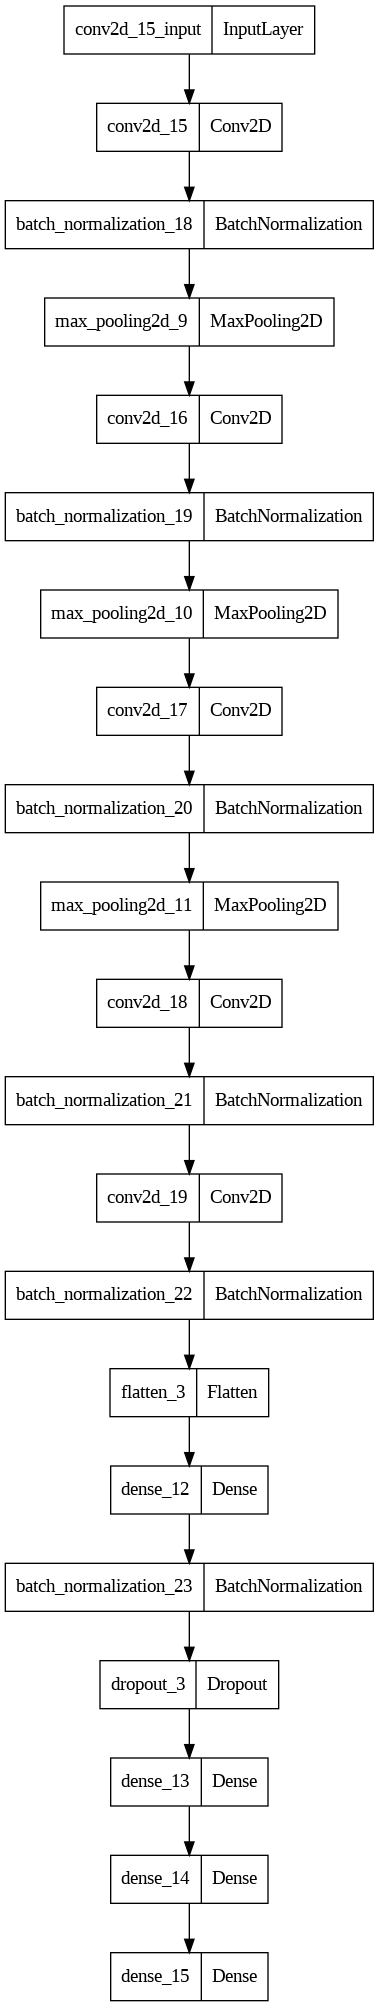

In [93]:
# plot graph
plot_model(model, to_file='plant_classification.png')

# Compiling the model


In [94]:
model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

In [95]:
#Getting model's summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_18 (Ba  (None, 55, 55, 96)        384       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_19 (Ba  (None, 27, 27, 256)       1024      
 tchNormalization)                                               
                                                      

In [96]:
#Specifing epochs & batch size
epochs = 40
batch_size = 3
image_height = 227
image_width = 227

# Image Augmentation

In [97]:
#Creating an object of ImageDataGenerator for augmenting training dataset
train_datagen = ImageDataGenerator(rescale= 1./255,
rotation_range=10,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.1,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest')

#Creating an object of ImageDataGenerator for augmenting test dataset
test_datagen = ImageDataGenerator(rescale= 1./255)

In [98]:
#Generating batches of Augmented data of image size 227, 227 and batch size of 32
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= (image_height, image_width), # resize to this size
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical"
)

test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size=(image_height, image_width),
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

nb_train_samples = train_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())

Found 122 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


# Creating callback list

In [99]:
from keras.callbacks import ReduceLROnPlateau
#Callback to save the best model. Using checkpoint and earlystopping to monitor validation accuracy
callbacks_list = [
    tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=10, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='plant_model.h5',
        monitor='val_accuracy', save_best_only=True, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10,verbose=1)
]

# Model Fit

In [100]:
#Fitting the model
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=test_generator,
        verbose = 1,
        validation_steps=nb_test_samples // batch_size)

Epoch 1/40
40/40 [==============================] - ETA: 0s - loss: 1.3187 - accuracy: 0.3109
Epoch 1: val_accuracy improved from -inf to 0.41667, saving model to plant_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 67s 2s/step - loss: 1.3187 - accuracy: 0.3109 - val_loss: 1.0923 - val_accuracy: 0.4167 - lr: 1.0000e-05
Epoch 2/40
40/40 [==============================] - ETA: 0s - loss: 1.1785 - accuracy: 0.4370
Epoch 2: val_accuracy did not improve from 0.41667
40/40 [==============================] - 63s 2s/step - loss: 1.1785 - accuracy: 0.4370 - val_loss: 1.0862 - val_accuracy: 0.4167 - lr: 1.0000e-05
Epoch 3/40
40/40 [==============================] - ETA: 0s - loss: 1.1965 - accuracy: 0.3950
Epoch 3: val_accuracy did not improve from 0.41667
40/40 [==============================] - 63s 2s/step - loss: 1.1965 - accuracy: 0.3950 - val_loss: 1.0840 - val_accuracy: 0.4167 - lr: 1.0000e-05
Epoch 4/40
40/40 [==============================] - ETA: 0s - loss: 1.0788 - accuracy: 0.4538
Epoch 4: val_accuracy did not improve from 0.41667
40/40 [==============================] - 65s 2s/step - loss: 1.0788 - accuracy: 0.4538 - val_loss: 1.0941 - val_accuracy: 0.416

# Accuracy and loss Learning curves

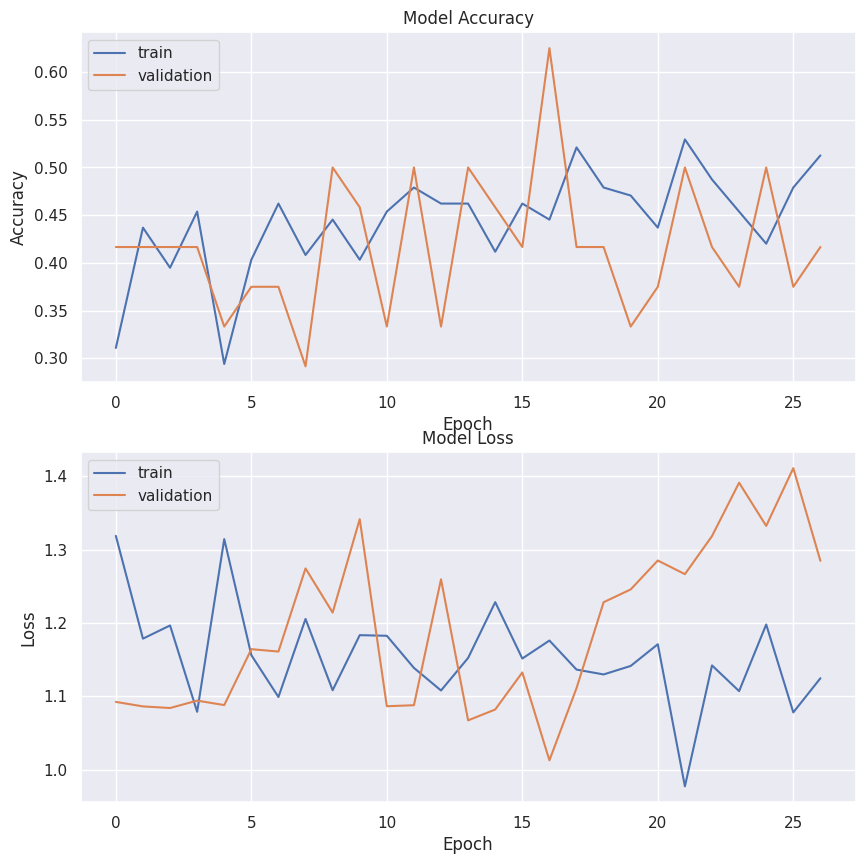

In [101]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

# plotting model loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluating model

In [102]:
# model evaluation
score = model.evaluate(test_generator)
print('test loss:', score[0])
print('test accuracy:', score[1])

8/8 [==============================] - 1s 143ms/step - loss: 1.2846 - accuracy: 0.4167
test loss: 1.2846136093139648
test accuracy: 0.4166666567325592


# Model Saving and Prediction

In [103]:
# save the whole model
model.save("./plant_model.h5")

In [104]:
# make a prediction for a new image.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

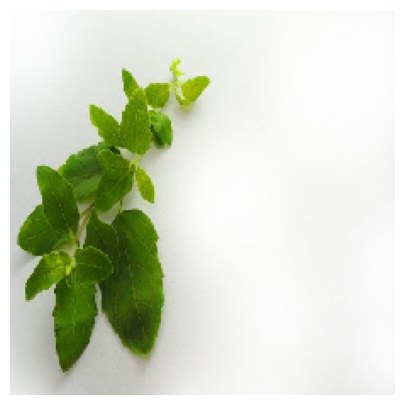

In [105]:
sample_path='./Dataset/Dataset/new_samples/'
img = load_img("/content/data/Holy basil/292d83f842726152d9934a1f45b7808d.jpg", target_size=(227,227))
plt.imshow(img)
plt.axis("off")
plt.show()

In [106]:
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, color_mode="rgb", target_size=(227, 227, 3))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 227, 227, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [131]:
img = load_image("/content/pre/Mint/mint-600x600.jpg")
model = load_model('plant_model.h5')

In [132]:
# predict the class
predict_x=model.predict(img)
result=np.argmax(predict_x,axis=1)
if result[0] == 0:
    print("Holy basil")
elif result[0] == 1:
    print("Mint")
elif result[0] == 2:
    print("Sweet basil")
else:
    print("Not in the list")

1/1 [==============================] - 0s 270ms/step
Mint
